# **How the approach to handling missing values affects the result for Exploratory data analysis**

## Authors Markus Nygren & Oscar Wikström
These notebooks contain the code for the EDA for CO2 Emissions by Country. 
Explanations for the code will be provided with markdown cells if applicable. More in depth reasonings and theory can be found in the thesis.

## **What we are measuring written below:**
- Mean value
- Median value 
- normal distribution  
- Relations between columns
- Top 10 highest CO2 Emissions by Country
- Top 10 lowest CO2 Emissions by Country

### **Methodologies for the handling of missing values written below:**
- raw (base value) 
- Remove row with at leasy one empty value (null/NaN)
- Replace empty values with the mean value per column
- KNN imputation with and without normalization

**Metrics for each column:**
 
- 'Year', 'Total', 'Coal', 'Oil', 'Gas','Cement', 'Flaring', 'Other', = Megatonnes 
- per capita = tons

**The base values we use for the comparison can be found in this file**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import sys
# suppress warnings
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

try:
    dataCo2 = pd.read_csv("Co2.csv")
    dataCo2= pd.DataFrame(dataCo2)
except:
    FileNotFoundError 
    print("data can´t be found")

print(dataCo2) # to see the basic structure of the data


           Country ISO 3166-1 alpha-3  UN M49  Year         Total  \
0      Afghanistan                AFG       4  1750           NaN   
1      Afghanistan                AFG       4  1751           NaN   
2      Afghanistan                AFG       4  1752           NaN   
3      Afghanistan                AFG       4  1753           NaN   
4      Afghanistan                AFG       4  1754           NaN   
...            ...                ...     ...   ...           ...   
61420       Global                WLD     756  2018  36766.912297   
61421       Global                WLD     756  2019  37039.881946   
61422       Global                WLD     756  2020  35007.822458   
61423       Global                WLD     756  2021  36815.680623   
61424       Global                WLD     756  2022  37150.949699   

               Coal           Oil          Gas       Cement     Flaring  \
0               NaN           NaN          NaN     0.000000         NaN   
1               NaN  

In [2]:
# Rename coulmn names to be more readable
dataCo2=dataCo2.rename({"ISO 3166-1 alpha-3": "ISO Code", "Total":"Total Co2 Emission (Mt)", "Per Capita":"Per Capita (t)"},axis=1)
dataCo2 = dataCo2.drop(["UN M49"], axis=1) # This is recommended by the author as the column is not yet reliable.
print(dataCo2.columns,"\n")


Index(['Country', 'ISO Code', 'Year', 'Total Co2 Emission (Mt)', 'Coal', 'Oil',
       'Gas', 'Cement', 'Flaring', 'Other', 'Per Capita (t)'],
      dtype='object') 



In [3]:
dataCo2.describe() # to get some basic information about the dataset


,Year,Total Co2 Emission (Mt),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita (t)
count,61425.000000,23172.000000,22955.000000,21770.000000,21742.000000,23541.000000,21651.000000,1813.000000,17543.000000
mean,1886.000000,153.057634,71.425477,56.566270,24.080376,3.965080,1.789797,10.124879,4.763254
std,78.808425,1376.320553,594.232230,522.758011,252.822435,48.715779,17.301231,37.883406,17.135050
min,1750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1818.000000,0.307776,0.000000,0.095264,0.000000,0.000000,0.000000,0.172812,0.344935
50%,1886.000000,3.037972,0.219840,1.099765,0.000000,0.000000,0.000000,1.112692,1.655755
75%,1954.000000,25.303708,6.014111,8.956724,0.661014,0.436197,0.000000,4.109894,5.670349
max,2022.000000,37150.949699,15222.908123,12377.248495,7922.817236,1692.365347,435.425169,305.386753,781.001509


In [4]:
print("number of nan values per column\n",dataCo2.isna().sum()) # check for nan values.

number of nan values per column
 Country                        0
ISO Code                    1092
Year                           0
Total Co2 Emission (Mt)    38253
Coal                       38470
Oil                        39655
Gas                        39683
Cement                     37884
Flaring                    39774
Other                      59612
Per Capita (t)             43882
dtype: int64


In [5]:
count =0
for country in dataCo2["Country"].unique(): # Here we learn that global (total emission for world) has unique rows and if we don´t remove them we will get duplicate emission
    count=count+1
    print(country)
print("There are",count,"of unique countries/region in the dataset")

Afghanistan
Albania
Algeria
Andorra
Angola
Anguilla
Antarctica
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bonaire, Saint Eustatius and Saba
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cambodia
Canada
Cape Verde
Central African Republic
Chad
Chile
China
Christmas Island
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Côte d'Ivoire
Croatia
Cuba
Curaçao
Cyprus
Czechia
North Korea
Democratic Republic of the Congo
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Ethiopia
Faeroe Islands
Micronesia (Federated States of)
Fiji
Finland
Panama Canal Zone
France
French Polynesia
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Greenland
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
Iraq
Ireland
Iran
Israel
Italy
Jamaica
J

## **The start of analysis without any datacleaning**
**This will be the baseline going forward to compare to**

In [6]:
drop_global= dataCo2[(dataCo2["Country"]=="Global")].index 
print(dataCo2.drop(columns=['Year']).drop(drop_global).mean())

Total Co2 Emission (Mt)    77.441187
Coal                       36.142576
Oil                        28.503095
Gas                        12.118780
Cement                      1.994657
Flaring                     0.897926
Other                       5.613362
Per Capita (t)              4.814729
dtype: float64


In [7]:
print(dataCo2.drop(columns=['Year']).drop(drop_global).median()) 

Total Co2 Emission (Mt)    2.896020
Coal                       0.197399
Oil                        1.066224
Gas                        0.000000
Cement                     0.000000
Flaring                    0.000000
Other                      1.081628
Per Capita (t)             1.664883
dtype: float64


In [8]:
print(dataCo2.drop(columns=['Year']).drop(drop_global).mode(numeric_only=True)) 

   Total Co2 Emission (Mt)  Coal  Oil  Gas  Cement  Flaring  Other  \
0                      0.0   0.0  0.0  0.0     0.0      0.0    0.0   

   Per Capita (t)  
0             0.0  


In [9]:
print(dataCo2.drop(columns=['Year']).drop(drop_global).std()) #Standard deviation

Total Co2 Emission (Mt)    424.726216
Coal                       245.733304
Oil                        142.531079
Gas                         76.402775
Cement                      20.939511
Flaring                      4.490466
Other                       17.872621
Per Capita (t)              17.263746
dtype: float64


In [10]:
print(dataCo2.head())

       Country ISO Code  Year  Total Co2 Emission (Mt)  Coal  Oil  Gas  \
0  Afghanistan      AFG  1750                      NaN   NaN  NaN  NaN   
1  Afghanistan      AFG  1751                      NaN   NaN  NaN  NaN   
2  Afghanistan      AFG  1752                      NaN   NaN  NaN  NaN   
3  Afghanistan      AFG  1753                      NaN   NaN  NaN  NaN   
4  Afghanistan      AFG  1754                      NaN   NaN  NaN  NaN   

   Cement  Flaring  Other  Per Capita (t)  
0     0.0      NaN    NaN             NaN  
1     0.0      NaN    NaN             NaN  
2     0.0      NaN    NaN             NaN  
3     0.0      NaN    NaN             NaN  
4     0.0      NaN    NaN             NaN  


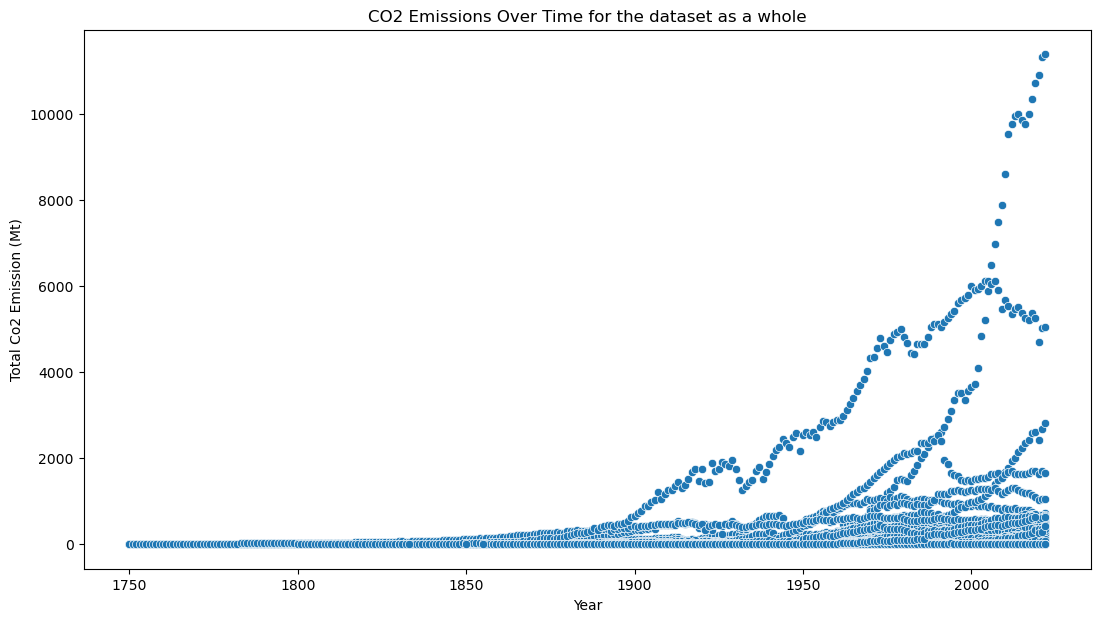

In [11]:

plt.figure(figsize=(13, 7))
sbn.scatterplot(x=dataCo2['Year'].drop(drop_global), y=dataCo2['Total Co2 Emission (Mt)']) # trend across the dataset
plt.title(f'CO2 Emissions Over Time for the dataset as a whole')
plt.show()

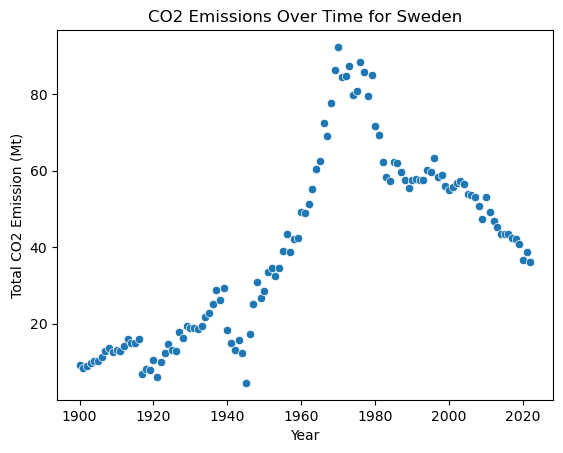

In [12]:
country_name = "Sweden" # Change this line to whatever Country interests you
country_data = dataCo2[dataCo2['Country'] == country_name]

# Filter the data for the time period you're interested in (e.g., after 1900)
filtered_data = country_data[country_data['Year'] >= 1900]

# Plot CO2 emissions over time for the selected country and time period
sbn.scatterplot(x=filtered_data['Year'], y=filtered_data['Total Co2 Emission (Mt)'])
plt.title(f'CO2 Emissions Over Time for {country_name}')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emission (Mt)')
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Total Co2 Emission (Mt)'>

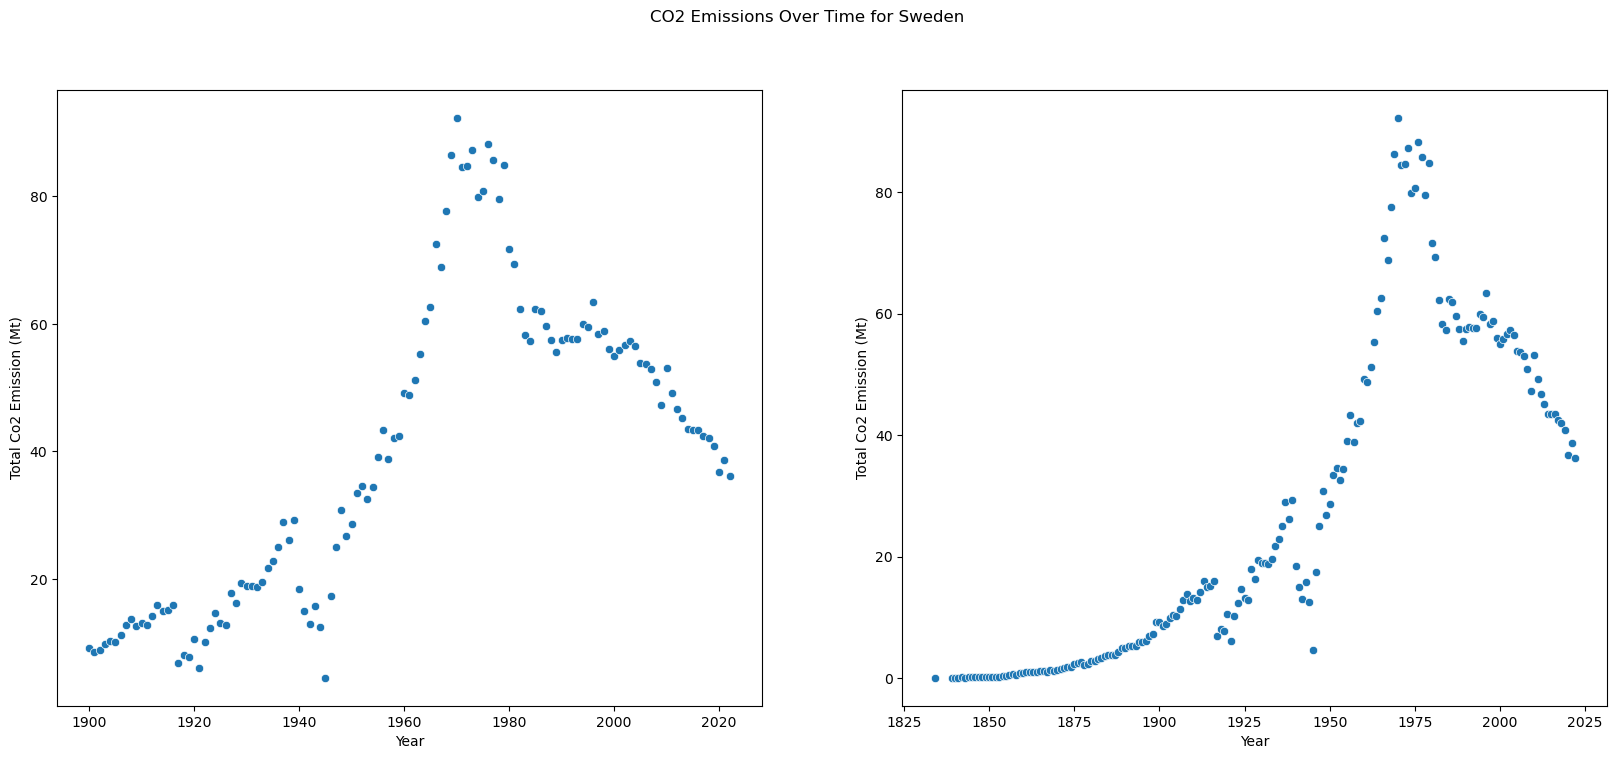

In [13]:
country_name = "Sweden" # Change this line to whatever Country interests you
country_data = dataCo2[dataCo2['Country'] == country_name]

filtered_data = country_data[country_data['Year'] >= 1900]

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(20,8)) # first number is rows with plots and second number is amount of plots per row.
fig.suptitle(f'CO2 Emissions Over Time for {country_name}')
sbn.scatterplot(ax=axes[0], data=filtered_data, x=filtered_data['Year'], y=filtered_data['Total Co2 Emission (Mt)'])
sbn.scatterplot(ax=axes[1], data=dataCo2, x=country_data['Year'], y=country_data['Total Co2 Emission (Mt)'])


<AxesSubplot:xlabel='Year', ylabel='Total Co2 Emission (Mt)'>

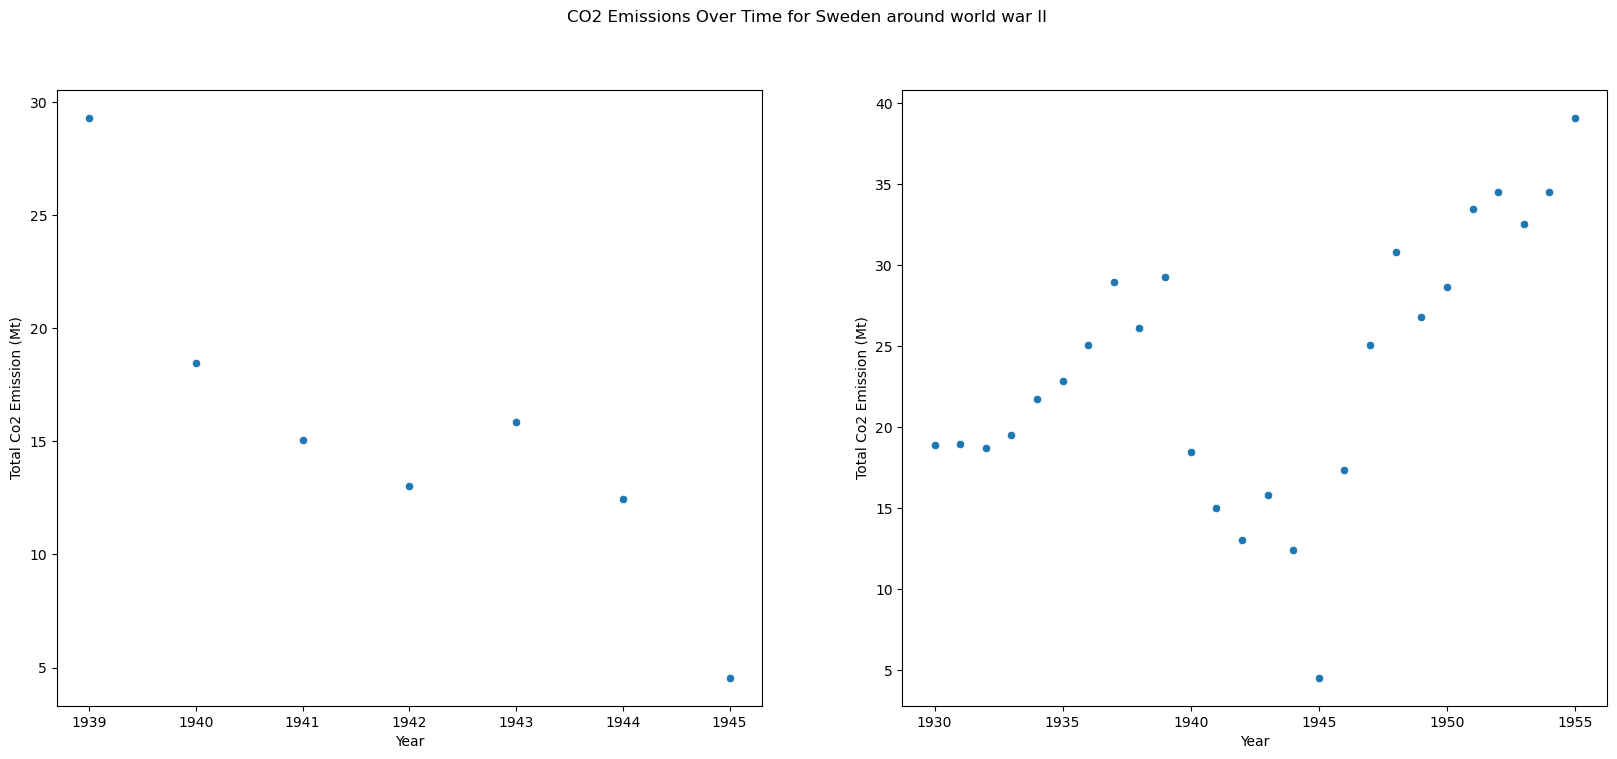

In [14]:
country_name = "Sweden" # Change this line to whatever Country interests you
country_data = dataCo2[dataCo2['Country'] == country_name]

filtered_data = country_data[(country_data['Year'] >=1939) & (country_data['Year'] <=1945)]
filtered_data2 = country_data[(country_data['Year'] >=1930) & (country_data['Year'] <=1955)]

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(20,8)) # first number is rows with plots and second number is amount of plots per row.
fig.suptitle(f'CO2 Emissions Over Time for {country_name} around world war II')
sbn.scatterplot(ax=axes[0], data=filtered_data, x=filtered_data['Year'], y=filtered_data['Total Co2 Emission (Mt)'])
sbn.scatterplot(ax=axes[1], data=filtered_data2, x=filtered_data2['Year'], y=filtered_data2['Total Co2 Emission (Mt)'])

Text(0.5, 1.0, 'World war 2')

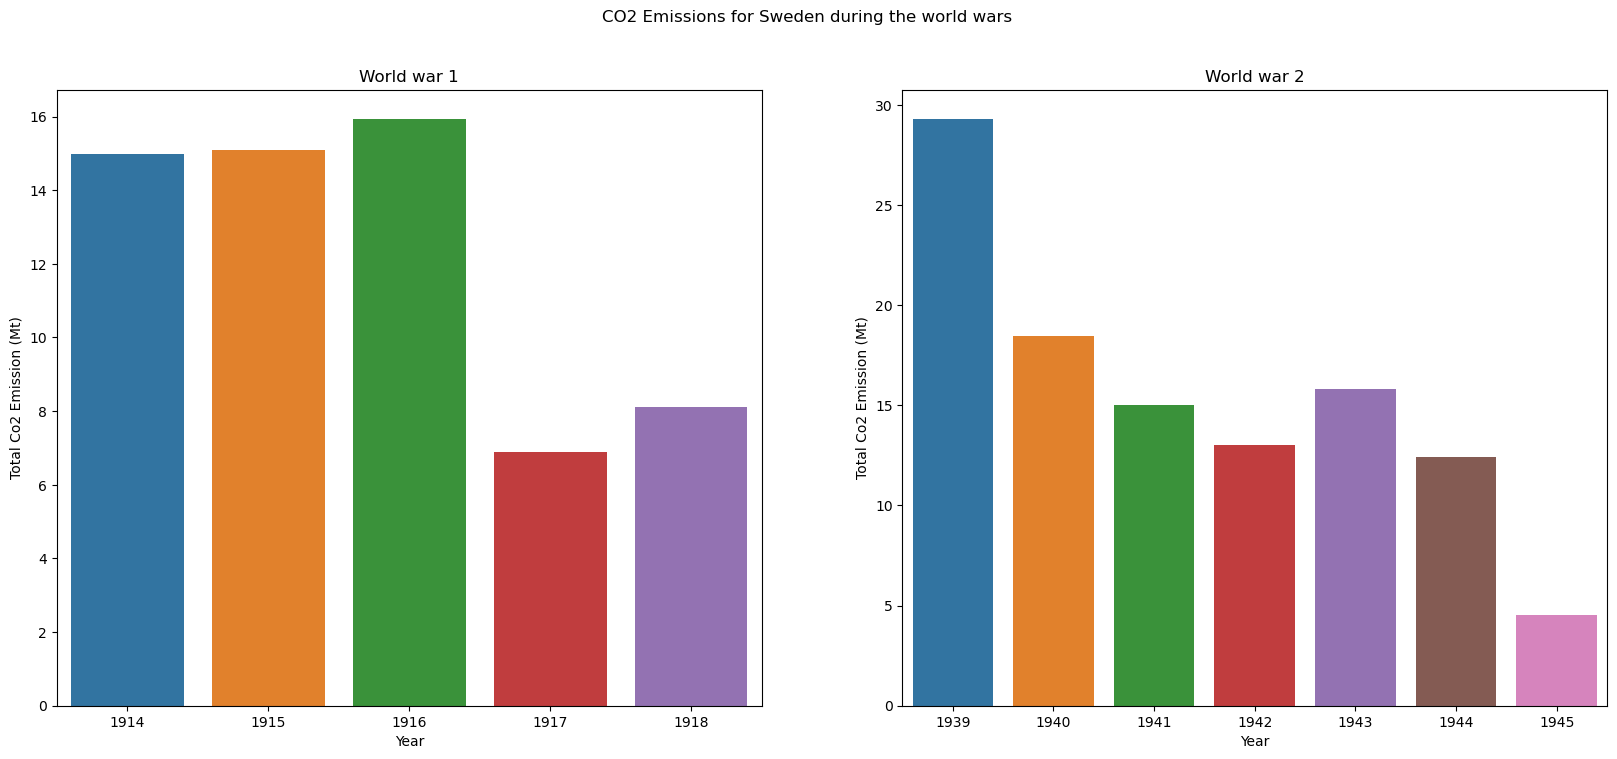

In [15]:
country_name = "Sweden" # Change this line to whatever Country interests you
country_data = dataCo2[dataCo2['Country'] == country_name]

filtered_data = country_data[(country_data['Year'] >=1914) & (country_data['Year'] <=1918)]
filtered_data2 = country_data[(country_data['Year'] >=1939) & (country_data['Year'] <=1945)]

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(20,8)) # first number is rows with plots and second number is amount of plots per row.
fig.suptitle(f'CO2 Emissions for {country_name} during the world wars')
sbn.barplot(ax=axes[0], data=filtered_data, x='Year', y='Total Co2 Emission (Mt)')
axes[0].set_title('World war 1')

# Plotting bar plot for all years available
sbn.barplot(ax=axes[1], data=filtered_data2, x='Year', y='Total Co2 Emission (Mt)')
axes[1].set_title('World war 2')

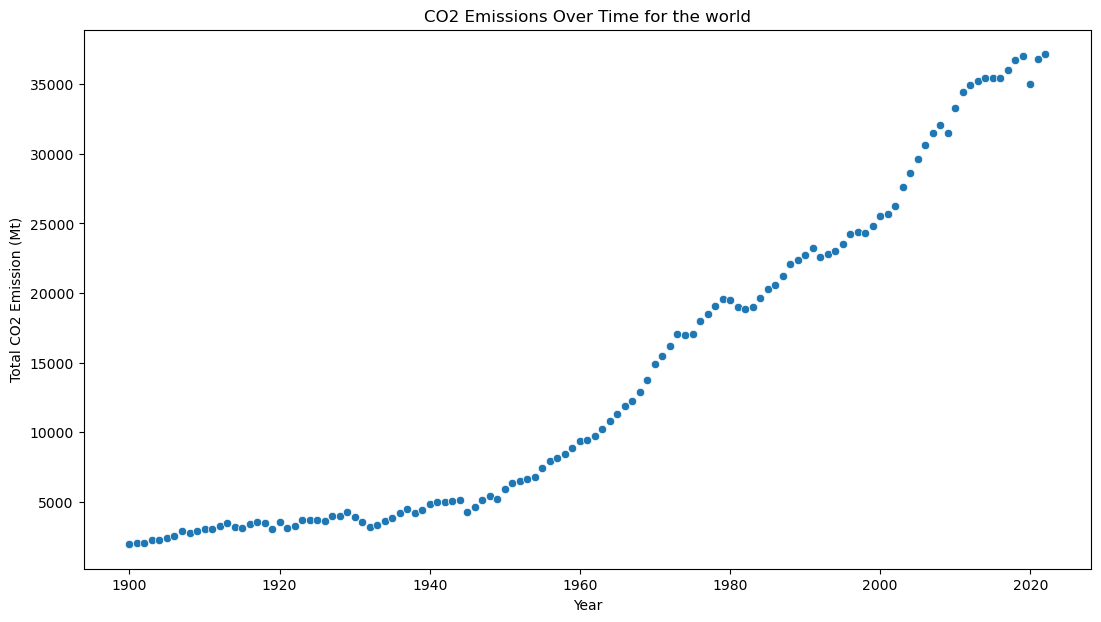

In [16]:
country_name = "Global" # Change this line to whatever Country interests you
country_data = dataCo2[dataCo2['Country'] == country_name]

# Filter the data for the time period you're interested in (e.g., after 1900)
filtered_data = country_data[country_data['Year'] >= 1900]

# Plot CO2 emissions over time for the selected country and time period
plt.figure(figsize=(13, 7))
sbn.scatterplot(x=filtered_data['Year'], y=filtered_data['Total Co2 Emission (Mt)'])
plt.title('CO2 Emissions Over Time for the world')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emission (Mt)')
plt.show()

In [17]:
dataCo2 = dataCo2.drop(drop_global) # here we drop the global rows completely. The reason why this wasn´t done earlier was so we still could look at the global trend above.
baseline = dataCo2[(dataCo2['Year'] >=1900)]
filtered_data = dataCo2[(dataCo2['Year'] >=1914) & (dataCo2['Year'] <=1918)]
filtered_data2 = dataCo2[(dataCo2['Year'] >=1939) & (dataCo2['Year'] <=1945)]

# remove year since it´s pointless and to make the output more readable
dataCo2_mean = dataCo2.drop(columns=['Year']).mean()
baseline_mean = baseline.drop(columns=['Year']).mean()
filtered_data_mean = filtered_data.drop(columns=['Year']).mean()
filtered_data2_mean = filtered_data2.drop(columns=['Year']).mean()

# Concatenating the means horizontally
side_by_side = pd.concat([dataCo2_mean, baseline_mean, filtered_data_mean, filtered_data2_mean], axis=1)
side_by_side.columns = ['full dataset', '1900 & forward', 'World war 1', 'World war 2']  

# Printing the concatenated DataFrame
print(side_by_side)
# Here we have a problem. The numbers don´t add up properly
# Let´s investigate

                         full dataset  1900 & forward  World war 1  \
Total Co2 Emission (Mt)     77.441187       88.623437    42.780257   
Coal                        36.142576       39.915395    39.530687   
Oil                         28.503095       32.451944     3.334272   
Gas                         12.118780       13.807638     0.545868   
Cement                       1.994657        2.540055     0.003302   
Flaring                      0.897926        1.023748     0.000000   
Other                        5.613362        5.613362     2.405880   
Per Capita (t)               4.814729        5.061052     2.973571   

                         World war 2  
Total Co2 Emission (Mt)    46.500899  
Coal                       35.663919  
Oil                         9.562760  
Gas                         1.819312  
Cement                      0.299971  
Flaring                     0.000000  
Other                       3.824679  
Per Capita (t)              3.294331  


Text(0.5, 1.0, 'World war 2')

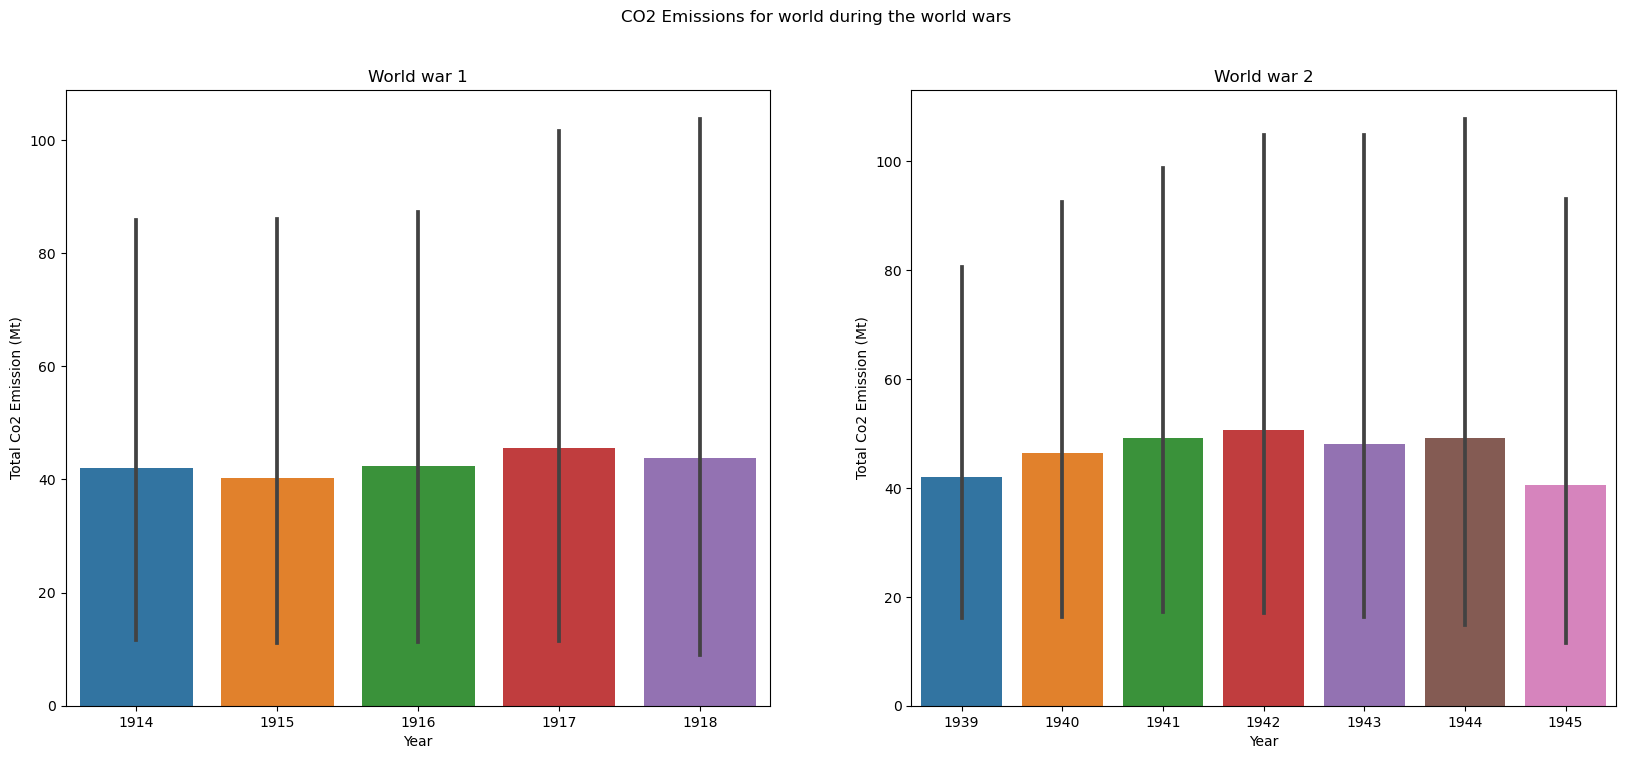

In [18]:
# Let´s start with visualizing the previous result. First the total emission
filtered_data = dataCo2[(dataCo2['Year'] >=1914) & (dataCo2['Year'] <=1918)]
filtered_data2 = dataCo2[(dataCo2['Year'] >=1939) & (dataCo2['Year'] <=1945)]

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(20,8)) # first number is rows with plots and second number is amount of plots per row.
fig.suptitle(f'CO2 Emissions for world during the world wars')
sbn.barplot(ax=axes[0], data=filtered_data, x='Year', y='Total Co2 Emission (Mt)')
axes[0].set_title('World war 1')

# Plotting bar plot for all years available
sbn.barplot(ax=axes[1], data=filtered_data2, x='Year', y='Total Co2 Emission (Mt)')
axes[1].set_title('World war 2')

Text(0.5, 1.0, 'World war 2')

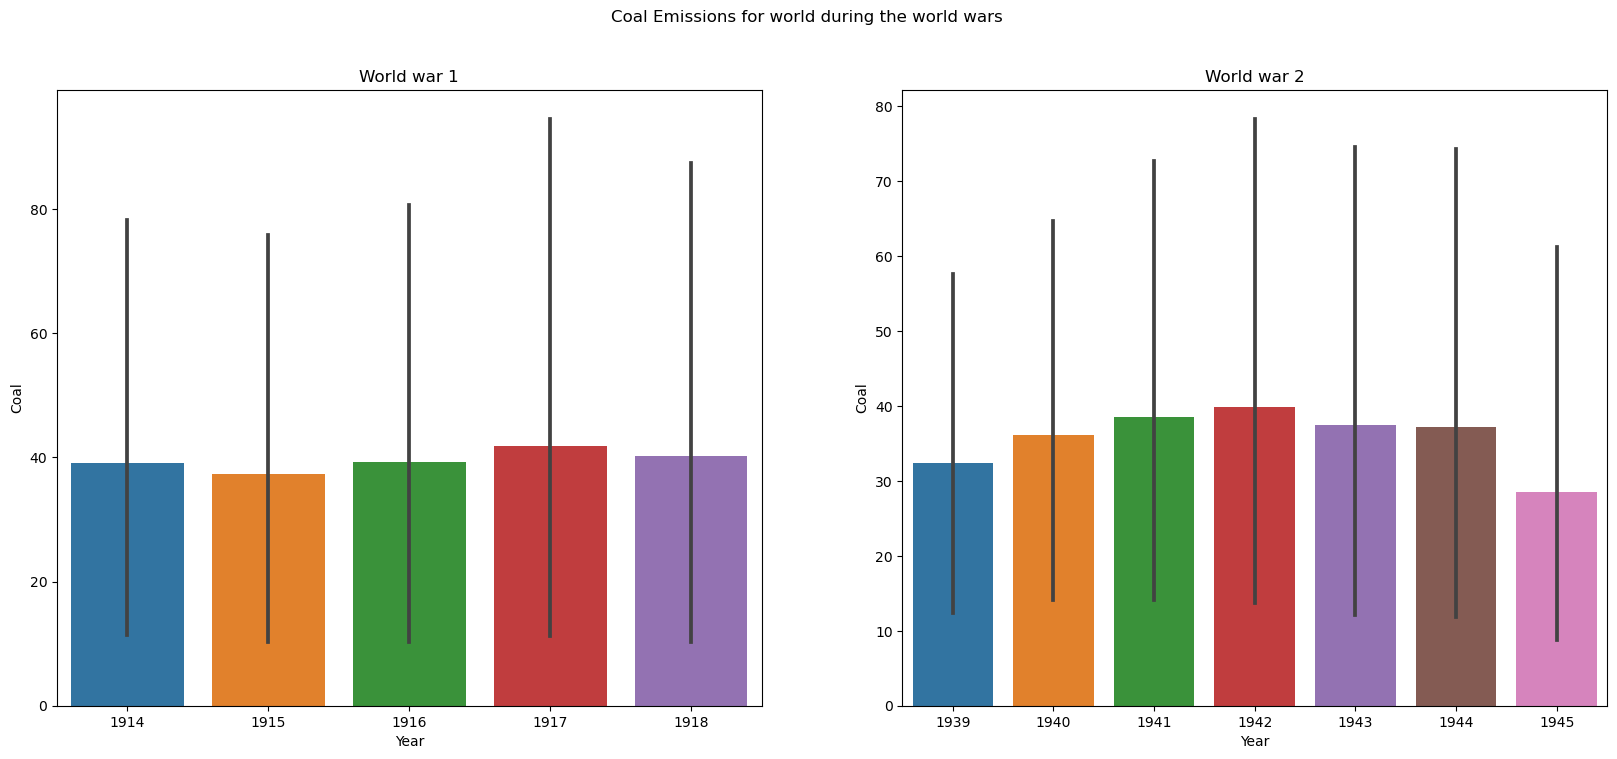

In [19]:
# And now the coal.
filtered_data = dataCo2[(dataCo2['Year'] >=1914) & (dataCo2['Year'] <=1918)]
filtered_data2 = dataCo2[(dataCo2['Year'] >=1939) & (dataCo2['Year'] <=1945)]

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(20,8)) # first number is rows with plots and second number is amount of plots per row.
fig.suptitle(f'Coal Emissions for world during the world wars')
sbn.barplot(ax=axes[0], data=filtered_data, x='Year', y='Coal')
axes[0].set_title('World war 1')

# Plotting bar plot for all years available
sbn.barplot(ax=axes[1], data=filtered_data2, x='Year', y='Coal')
axes[1].set_title('World war 2')

In [20]:
# Now let´s have a look at the missing values
side_by_side = pd.concat([filtered_data.count()+filtered_data.isna().sum(), filtered_data.isna().sum(), filtered_data2.count()+filtered_data2.isna().sum(), filtered_data2.isna().sum()], axis=1)
side_by_side.columns = ['World war 1 full', 'World war 1 nan', 'World war 2 full', 'World war 2 nan']  

# Printing the concatenated DataFrame
print(side_by_side)
# Here is the culprit of the misleading results. It ignores the missing values from the calculation and therefore the average goes up. Instead of deviding with 1155 like the total it´s 330 here.
# print(30922.672382/1155) # This is a more accurate comparison with the total Co2 emission for World war 1. 
# Take the total coal emission and devide it with the number of filled "Total Co2 Emission (Mt)" rows
# print(filtered_data.sum(),"\n")
# print(filtered_data.isna().sum(),"\n") 
# print(filtered_data.count(),"\n")
# print(30922.672382/330)

                         World war 1 full  World war 1 nan  World war 2 full  \
Country                              1120                0              1568   
ISO Code                             1120               20              1568   
Year                                 1120                0              1568   
Total Co2 Emission (Mt)              1120              728              1568   
Coal                                 1120              728              1568   
Oil                                  1120              795              1568   
Gas                                  1120              795              1568   
Cement                               1120              891              1568   
Flaring                              1120              795              1568   
Other                                1120             1115              1568   
Per Capita (t)                       1120             1010              1568   

                         World war 2 na

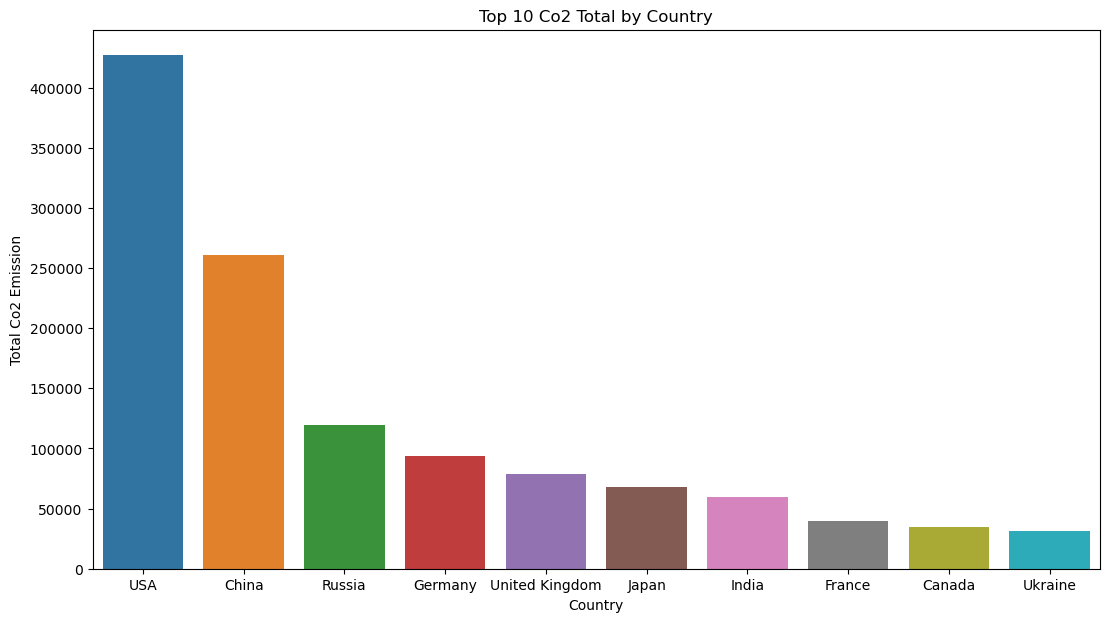

In [21]:

top_10 = dataCo2.groupby('Country')['Total Co2 Emission (Mt)'].sum().nlargest(10).reset_index() # Add the total emission per country and select the ten highest values

plt.figure(figsize=(13, 7))
sbn.barplot(data=top_10, x='Country', y='Total Co2 Emission (Mt)')
plt.xlabel('Country')
plt.ylabel('Total Co2 Emission')
plt.title('Top 10 Co2 Total by Country')

plt.show()


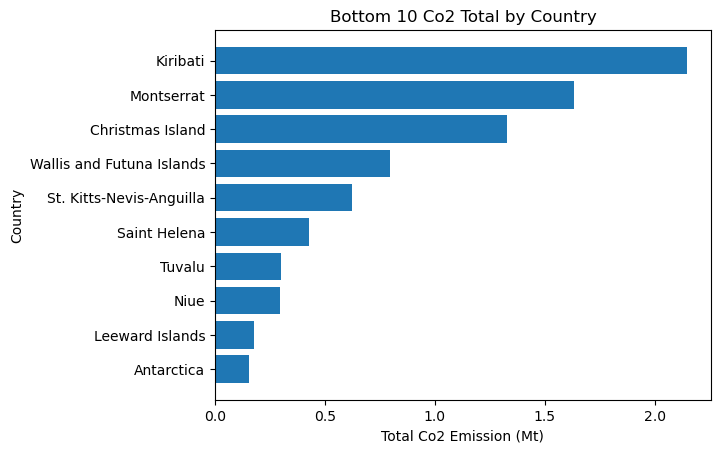

In [22]:
buttom_10 = dataCo2.groupby('Country')['Total Co2 Emission (Mt)'].sum().nsmallest(10).reset_index() # Add the total emission per country and select the ten lowest values
# The names were to long so I made the plot horizontal instead here.
plt.barh(y=buttom_10["Country"],width=buttom_10['Total Co2 Emission (Mt)'])
plt.xlabel('Total Co2 Emission (Mt)')
plt.ylabel('Country')
plt.title('Bottom 10 Co2 Total by Country')

plt.show()